<a href="https://colab.research.google.com/github/Swara-24/AI-2020/blob/master/AI_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [ ]:
dataset = pd.read_csv('/datasets-13720-18513-insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
x=dataset.iloc[:,:5].values
y=dataset.iloc[:,6].values
print(x[:5])
print(y[:5])

[[19 'female' 27.9 0 'yes']
 [18 'male' 33.77 1 'no']
 [28 'male' 33.0 3 'no']
 [33 'male' 22.705 0 'no']
 [32 'male' 28.88 0 'no']]
[16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_x= LabelEncoder()
x[:,1]=label_x.fit_transform(x[:,1])
x[:,4]=label_x.fit_transform(x[:,4])
print("The first five row of input variable \n",x[:5])

The first five row of input variable 
 [[19 0 27.9 0 1]
 [18 1 33.77 1 0]
 [28 1 33.0 3 0]
 [33 1 22.705 0 0]
 [32 1 28.88 0 0]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_regressor= LinearRegression()
lin_regressor.fit(x_train,y_train)
y_predict=lin_regressor.predict(x_test)
score=lin_regressor.score(x_test,y_test)
print("Linear Regression Accuracy is",score*100)

Linear Regression Accuracy is 79.52171980481992


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers  import SGD, Adam
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='softmax'))
model.compile(Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


<Figure size 432x288 with 0 Axes>

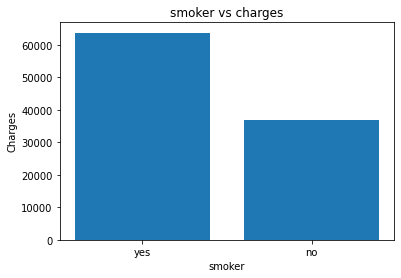

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.bar(dataset['smoker'],y,)
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.title('smoker vs charges')
plt.figure()